# Hurray !! Scikit-Learn In VS Code!! This Dark Mode, these features, extensions... I just love it :))

In [1]:
# Importing all necessary libraries at one go
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
heart_disease = pd.read_csv('data/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Getting our data ready to be used with Machine Learning Model

### 1. Three main things we have to do:

    1. Split the data into features and labels (usually `X` & `y`).    
    2. Filing (also called imputing) or disregarding missing values
    3. Converting non-numerical values into numerical values (also called feature encoding)

In [3]:
# Split the data into features & labels (say 'X' & 'y')

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

In [4]:
# split the data into training and test data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier()

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8524590163934426

### What if we have non-numerical value ?
#### Machine Learning Model does not work on Non-Numerical Values. So we need to make them all Numeric. 
Scikit-Learn comes with a module called `OneHotEncoder` that handles non-numerical values..
Let's have a look.
* Note: Here we will import another dataset for this as our previous dataset i.e. heart_disease dataset doesn't have non-numerical values to try our hands.. So Let's Dive In

In [5]:
car_sales = pd.read_csv('data/car-sales-extended.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [6]:
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

In [7]:
# Let's turn categories (Make, Colour & Doors) to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")
transformed_X = transformer.fit_transform(X)
# pd.DataFrame(transformed_X)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

model = RandomForestRegressor()

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.3235867221569877

We got so low score because predicting price of cars by their colour, or number of doors does not makes sense.

### What if we have missing values
We can do two things. Either we can fill with some values or completely remove them from dataset.

In [9]:
# import dataset with missing values
car_sales_missing = pd.read_csv('data/car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [10]:
# Let's see how many missing values are there
car_sales_missing.isnull().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [11]:
# At first, drop labels with missing values i.e. 'Price'
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [12]:
from sklearn.model_selection import train_test_split    
# Split into X and y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

# Split into train and test data
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [13]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_feature = ["Odometer (KM)"]

# Create an Imputer (An Imputer is something that fills up data)
imputer = ColumnTransformer([
    ('cat_imputer', cat_imputer, cat_features),
    ('door_imputer', door_imputer, door_feature),
    ('num_imputer', num_imputer, num_feature)
])

# Fill train and test values SEPARATELY
filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.fit_transform(X_test)

In [14]:
# Now get this newly edited data into Dataframe
car_sales_filled_train = pd.DataFrame(filled_X_train, columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled_test = pd.DataFrame(filled_X_test, columns=["Make", "Colour", "Doors", "Odometer (KM)"])


In [15]:
# Now we have to do OneHot Encoding (copy the same code as above)

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()

transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)])

transformed_X_train = transformer.fit_transform(car_sales_filled_train)
transformed_X_test = transformer.fit_transform(car_sales_filled_test)

In [16]:
# Let's finally fit the data
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

model = RandomForestRegressor()

model.fit(transformed_X_train, y_train)
model.score(transformed_X_test, y_test)

0.08787238417429777

## Choosing the right estimator/algorithm for your problem
Key Points:
* Sklearn refers to machine learning models, algorithms as `estimators`.
* `Classification` - predicting a category (whether this or that,   whether patient has heart disease or not).
* `Regression` - predicting a number (selling price of car).
 
* Sklearn Model Map - https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### Let's learn how to pick a machine learning model for a Regression Problem
Here we will use California Housing Dataset - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

In [17]:
# Get California Housing Dataset in your notebook
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [18]:
# Add this weird looking data in pandas dataframe, so that we can visualise it properly

# Adding data
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])

# Adding target column
housing_df["target"] = housing["target"]
housing_df.head()

housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [19]:
# Import algorithm/estimator
# we found this algorithm in model map. There are several other model, so we'll try different models & check which model is providing us better results.

from sklearn.linear_model import Ridge

np.random.seed(42)

# create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model on training set
model = Ridge()
model.fit(X_train, y_train)

# let's check the score of this model
model.score(X_test, y_test)

0.5758549611440128

So, `Ridge` model give us quite bad score i.e. 57%. As I said earlier, lets try out different model from that map.
Here I am trying `ensemble` model. Ensemble is combination of smaller models to try and make better predictions than just a single model. 
Let's see how this model performs

In [20]:
# import the model and its RandomForestRegressor module
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.8066196804802649

Wohooo! Its 80.6%. Much higher than just 57%. You can't predict which model is best before applying them. So keep applying models and check what is best for you.

### Picking Machine Learning Model for a Classification Problem

In [21]:
# Get heart disease dataset
heart_disease = pd.read_csv('data/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


After going through sklearn model map, we came through `LinearSVC` model. Let's jump into it

In [22]:
#  import the LinearSVC class
from sklearn.svm import LinearSVC

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearSVC(max_iter=10000)
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

/home/dev/Desktop/sample_project/env/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

### Evaluation Of Machine Learning Model
There are three ways to evaluate a model/estimator
1. Estimator's built-in `score()` method
2. The `scoring` parameter
3. Problem-specific metric functions

Article On this: https://scikit-learn.org/stable/modules/model_evaluation.html

#### 1. Evaluation using `score` method

In [23]:
from sklearn.ensemble import RandomForestClassifier

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

model = RandomForestClassifier(n_estimators=200)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

**Important**: The default `score()` evaluation metric is `mean accuracy` for `classification problem`.

In [24]:
model.score(X_test, y_test)

0.9016393442622951

Let's apply this `score` method on Regression problem

In [25]:
from sklearn.ensemble import RandomForestRegressor

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14)

model = RandomForestRegressor(n_estimators=200)
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.8170210010320518

**Important**: The default `score()` evaluation metric is `r_squared` for `regression problem`.

#### 2. Evaluating using `scoring` parameter

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

model = RandomForestClassifier(n_estimators=200)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [27]:
model.score(X_test, y_test)

0.8852459016393442

In [28]:
cross_val_score(model, X, y, cv=10)

array([0.90322581, 0.80645161, 0.83870968, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.83333333, 0.73333333, 0.8       ])

In [29]:
np.random.seed(4)
model_single_score = model.score(X_test, y_test)

model_cross_val_score = np.mean(cross_val_score(model, X, y, cv=5))

model_single_score, model_cross_val_score

(0.8852459016393442, 0.8346994535519124)

### Evaluation Matrices For Classification Model
1. Accuracy
2. Area Under ROC Curve
3. Confusion Matrix
4. Classification Report

## 1. Accuracy

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(4)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

model = RandomForestClassifier(n_estimators=200)
cross_val_score = cross_val_score(model, X, y, cv=5)

In [31]:
np.mean(cross_val_score)

0.8346994535519124

In [32]:
print(f'Heart Disease Classifier Accuracy: {np.mean(cross_val_score)*100:.2f}%')

Heart Disease Classifier Accuracy: 83.47%


## 2. Area Under Receiver Operating Characteristic Curve (AUC/ROC)

ROC curves are a comparison of a model's `True Positive Rate (TPR)` versus a model's `False Positive Rate (FPR)`.

* True Positive- Model predicts `1` when truth is `1`
* False Positive- Model predicts `1` when truth is `0`
* True Negative- Model predicts `0` when truth is `0`
* False Negative- Model predicts `0` when truth is `1`

In [33]:
# create X_train.....
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [34]:
from sklearn.metrics import roc_curve

model.fit(X_train, y_train)

# make predictions with probabilities
y_probs = model.predict_proba(X_test)
y_probs[:10], len(y_probs)

(array([[0.54 , 0.46 ],
        [0.675, 0.325],
        [0.195, 0.805],
        [0.02 , 0.98 ],
        [0.605, 0.395],
        [0.62 , 0.38 ],
        [0.67 , 0.33 ],
        [0.085, 0.915],
        [0.365, 0.635],
        [0.33 , 0.67 ]]),
 61)

In [35]:
y_probs_positives = y_probs[:, 1]
y_probs_positives[:10]

array([0.46 , 0.325, 0.805, 0.98 , 0.395, 0.38 , 0.33 , 0.915, 0.635,
       0.67 ])

In [36]:
# calculate FPR, TPR & thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positives)

# check the false positive rates
fpr

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.04, 0.04, 0.04, 0.04, 0.12, 0.12, 0.12, 0.12, 0.52,
       0.52, 0.72, 0.8 , 0.92, 1.  ])

## 3. Confusion Matrix

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you the idea of where the model is getting confused.

In [37]:
from sklearn.metrics import confusion_matrix

y_preds = model.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[22,  3],
       [ 5, 31]])

In [38]:
# Let's visualise confusion matrix with pd.crosstab()
pd.crosstab(y_test, y_preds, rownames=['Actual Labels'], colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Labels,,
0,22,3
1,5,31


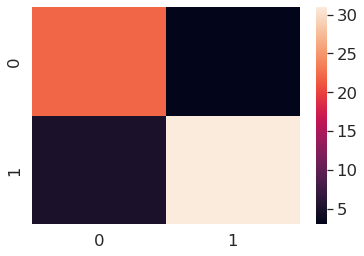

In [39]:
# Let's make our confusion matrix more visual with heatmap
import seaborn as sns

# set the font scale
sns.set(font_scale=1.5)

# create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# plot it using seaborn
sns.heatmap(conf_mat);

In [40]:
import sklearn
sklearn.__version__

'1.0.2'

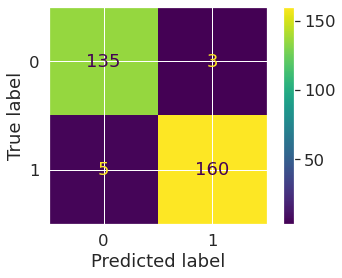

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=model, X=X, y=y);



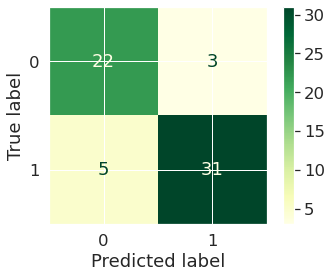

In [42]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds, cmap='YlGn');

Here's the list of all colormaps: https://matplotlib.org/stable/tutorials/colors/colormaps.html

## 4. Classification Report

In [43]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85        25
           1       0.91      0.86      0.89        36

    accuracy                           0.87        61
   macro avg       0.86      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



To summarize classification metrics:
* `Accuracy` is good measure for `Balanced Dataset`
* `Precision & Recall` are best for `Imbalanced Dataset`
* If `False Positive` Prediction are worse than `False Negative`, aim for `higher Precision`.
* If `False Negative` predictions are higher than `False Positive`, aim for `higher Recall`.
* `F1 score` is combination of `Precision` & `Recall`

## Regression Model Evaluation Metrics

1. R^2 (r-squared | coefficient of determination)
2. Mean Absolute Error (MAE)
3. Mean Squared Error (MSE)

In [44]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
X = housing_df.drop('target', axis=1)
y = housing_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor()

In [45]:
model.score(X_test, y_test)

0.8066196804802649

In [46]:
from sklearn.metrics import r2_score

# fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [47]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [48]:
r2_score(y_true=y_test, y_pred=y_test)

1.0

### Let's Try & Use `scoring` parameter

`scoring` parameter can be used with functions like `cross_val_score()` to tell Scikit_Learn what evaluation metric to return using cross-validation. By default, `mean accuracy` is used in `classification model` & `r-squared` in `regression model`.

1.  Classification Model

In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

model = RandomForestClassifier(n_estimators=100)

First, let's use default i.e. `mean accuracy`

In [50]:
cv_score = cross_val_score(model, X, y, cv=5)
cv_score

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [51]:
# mean of cv_score (accuracy)
print(f'cross-validation score with Accuracy: {np.mean(cv_score)*100:.2f}%')

cross-validation score with Accuracy: 82.48%


It's time for `precision`

In [52]:
cv_precision_score = cross_val_score(model, X, y, scoring='precision')

print(f'cross-validation score With Precision: {np.mean(cv_precision_score):.2f}')

cross-validation score With Precision: 0.81


Why you stopped baby! Try `recall`

In [53]:
cv_recall_score = cross_val_score(model, X, y, scoring='recall')

print(f'cross-validation score With Recall: {np.mean(cv_recall_score):.2f}')

cross-validation score With Recall: 0.84


## Hyperparameters Tuning

In [54]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We're going to try and adjust:
* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`